<a href="https://colab.research.google.com/github/nana881023/Financial_Big_Data_Analysis/blob/main/Week3_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week3作業
1. 計算技術指標（SMA、RSI、MACD）
2. 可視化 K 線圖
3. 技術指標結合機器學習（線性回歸、決策樹、隨機森林）預測股價漲跌。使用技術指標作為特徵來預測第 n 天的股價

### yfinance
- 下載2330從2024.1.1到今天的資料
- 要輸出成表格
- 包含日期、開、高、低、收、量

In [1]:
import yfinance as yf  # yfinance：下載股票數據
import pandas as pd  # pandas：數據處理
from datetime import datetime  # datetime：用於處理日期

In [2]:
# 股票
stock_id="2330.TW"
start_date="2024-01-01" # 從2324.01.01開始
end_date=datetime.today().strftime("%Y-%m-%d")  # 今天

# 下載股票資料
data=yf.download(stock_id,start=start_date,end=end_date)
data=data.reset_index() # 重製索引，因為yf中日期通常是index，用重製的方法給真正的index

data

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-01-02,590.0,593.0,589.0,593.0,585.360962,26059058
1,2024-01-03,584.0,585.0,576.0,578.0,570.554199,37106763
2,2024-01-04,580.0,581.0,577.0,580.0,572.528381,15309129
3,2024-01-05,578.0,580.0,574.0,576.0,568.579956,18158971
4,2024-01-08,582.0,585.0,579.0,583.0,575.489746,17761275
...,...,...,...,...,...,...,...
174,2024-09-23,971.0,977.0,971.0,977.0,977.000000,14497067
175,2024-09-24,976.0,987.0,971.0,987.0,987.000000,26785975
176,2024-09-25,1000.0,1005.0,998.0,1005.0,1005.000000,39405222
177,2024-09-26,1010.0,1015.0,1005.0,1015.0,1015.000000,38321585


### 簡單移動平均線(SMA)
- 分成5、10、26日：短、中、長，共三種
- 輸出在data表格裡

In [3]:
data['SMA_5']=data['Close'].rolling(window=5).mean()  # 5日SMA
data['SMA_10']=data['Close'].rolling(window=10).mean()  # 10日SMA
data['SMA_26']=data['Close'].rolling(window=26).mean()  # 26日SMA

data

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_5,SMA_10,SMA_26
0,2024-01-02,590.0,593.0,589.0,593.0,585.360962,26059058,NaN,NaN,NaN
1,2024-01-03,584.0,585.0,576.0,578.0,570.554199,37106763,NaN,NaN,NaN
2,2024-01-04,580.0,581.0,577.0,580.0,572.528381,15309129,NaN,NaN,NaN
3,2024-01-05,578.0,580.0,574.0,576.0,568.579956,18158971,NaN,NaN,NaN
4,2024-01-08,582.0,585.0,579.0,583.0,575.489746,17761275,582.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
174,2024-09-23,971.0,977.0,971.0,977.0,977.000000,14497067,959.6,938.9,942.384615
175,2024-09-24,976.0,987.0,971.0,987.0,987.000000,26785975,967.6,947.7,943.076923
176,2024-09-25,1000.0,1005.0,998.0,1005.0,1005.000000,39405222,980.4,957.8,944.307692
177,2024-09-26,1010.0,1015.0,1005.0,1015.0,1015.000000,38321585,991.4,969.2,945.923077


### 相對強弱指數(RSI)
- 分成9、14：短、長，共兩種
- 輸出在data表格裡
- RSI的公是比較長，用def做撰寫

In [4]:
def calculate_rsi(data,period):
  # 1.計算價格變化
  delta=data['Close'].diff()  # 計算每日收盤價的變化

  # 2.計算上漲和下跌
  gain=delta.where(delta>0,0)  # 如果delta>0(上漲)，則為delta，否則為0
  loss=-delta.where(delta<0,0)  # 如果delta<0(下跌)，則取delta的絕對值，否則設為 0

  # 3.計算平均上漲和平均下跌
  avg_gain=gain.rolling(window=period).mean()  # 平均上漲
  avg_loss=loss.rolling(window=period).mean()  # 平均下跌

  # 4.計算相對強度(RS)
  rs=avg_gain/avg_loss  # 相對強度=平均上漲/平均下跌

  # 5.RS轉成RSI
  rsi=100-(100/(1+rs))  # RSI=100-(100/1+RS)

  return rsi

In [5]:
data["rsi_9"]=calculate_rsi(data,9)  # 9日RSI
data["rsi_14"]=calculate_rsi(data,14)  # 14日RSI

data

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_5,SMA_10,SMA_26,rsi_9,rsi_14
0,2024-01-02,590.0,593.0,589.0,593.0,585.360962,26059058,NaN,NaN,NaN,NaN,NaN
1,2024-01-03,584.0,585.0,576.0,578.0,570.554199,37106763,NaN,NaN,NaN,NaN,NaN
2,2024-01-04,580.0,581.0,577.0,580.0,572.528381,15309129,NaN,NaN,NaN,NaN,NaN
3,2024-01-05,578.0,580.0,574.0,576.0,568.579956,18158971,NaN,NaN,NaN,NaN,NaN
4,2024-01-08,582.0,585.0,579.0,583.0,575.489746,17761275,582.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
174,2024-09-23,971.0,977.0,971.0,977.0,977.000000,14497067,959.6,938.9,942.384615,90.625000,57.142857
175,2024-09-24,976.0,987.0,971.0,987.0,987.000000,26785975,967.6,947.7,943.076923,91.089109,61.463415
176,2024-09-25,1000.0,1005.0,998.0,1005.0,1005.000000,39405222,980.4,957.8,944.307692,94.827586,83.720930
177,2024-09-26,1010.0,1015.0,1005.0,1015.0,1015.000000,38321585,991.4,969.2,945.923077,93.103448,83.431953


### 移動平均收斂背離(MACD)
- MACD線=12日SMA-26日SMA
- 訊號線=9日MACD線的EMA   #二次的訊號處理
- MACD柱狀圖=MACD線(快線)-訊號線(慢線)

In [6]:
#adjust=False：表示在計算指數移動平均線（EMA）時，不對權重進行調整，從而更接近傳統的 EMA 計算方法。
data["EMA_12"]=data["Close"].ewm(span=12,adjust=False).mean()  # 12日EMA，
data["EMA_26"]=data["Close"].ewm(span=26,adjust=False).mean()  # 26日EMA

data["MACD"]=data["EMA_12"]-data["EMA_26"]  # MACD線

data["Signal_Line"]=data["MACD"].ewm(span=9,adjust=False).mean()  # 訊號線=9日MACD線的EMA

data



,Date,Open,High,Low,Close,Adj Close,Volume,SMA_5,SMA_10,SMA_26,rsi_9,rsi_14,EMA_12,EMA_26,MACD,Signal_Line
0,2024-01-02,590.0,593.0,589.0,593.0,585.360962,26059058,NaN,NaN,NaN,NaN,NaN,593.000000,593.000000,0.000000,0.000000
1,2024-01-03,584.0,585.0,576.0,578.0,570.554199,37106763,NaN,NaN,NaN,NaN,NaN,590.692308,591.888889,-1.196581,-0.239316
2,2024-01-04,580.0,581.0,577.0,580.0,572.528381,15309129,NaN,NaN,NaN,NaN,NaN,589.047337,591.008230,-1.960893,-0.583632
3,2024-01-05,578.0,580.0,574.0,576.0,568.579956,18158971,NaN,NaN,NaN,NaN,NaN,587.040055,589.896510,-2.856455,-1.038196
4,2024-01-08,582.0,585.0,579.0,583.0,575.489746,17761275,582.0,NaN,NaN,NaN,NaN,586.418508,589.385657,-2.967149,-1.423987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,2024-09-23,971.0,977.0,971.0,977.0,977.000000,14497067,959.6,938.9,942.384615,90.625000,57.142857,946.801709,941.929724,4.871985,-2.053574
175,2024-09-24,976.0,987.0,971.0,987.0,987.000000,26785975,967.6,947.7,943.076923,91.089109,61.463415,952.986062,945.268263,7.717799,-0.099300
176,2024-09-25,1000.0,1005.0,998.0,1005.0,1005.000000,39405222,980.4,957.8,944.307692,94.827586,83.720930,960.988206,949.692836,11.295370,2.179634
177,2024-09-26,1010.0,1015.0,1005.0,1015.0,1015.000000,38321585,991.4,969.2,945.923077,93.103448,83.431953,969.297713,954.530404,14.767309,4.697169


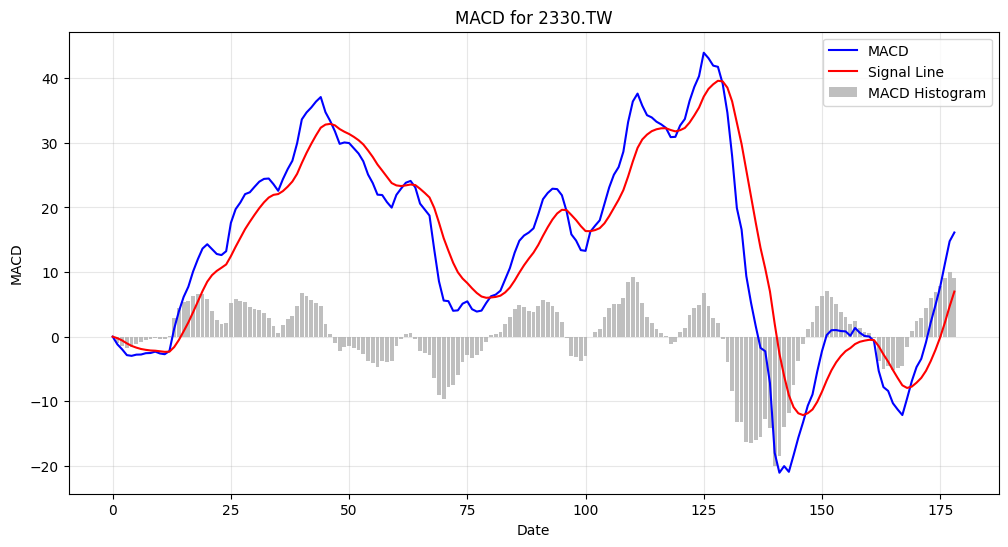

In [7]:
import matplotlib.pyplot as plt

macd_histogram = data["MACD"] - data["Signal_Line"]

# 繪製 MACD 柱狀圖
plt.figure(figsize=(12, 6))
plt.bar(data.index, macd_histogram, color='gray', alpha=0.5, label='MACD Histogram')
plt.plot(data.index, data["MACD"], color='blue', label='MACD')
plt.plot(data.index, data["Signal_Line"], color='red', label='Signal Line')
plt.title(f'MACD for {stock_id}')
plt.legend()
plt.xlabel('Date')
plt.ylabel('MACD')
plt.grid(True, alpha=0.3)
plt.show()

### 可視化K線圖
- mplfinance：繪製金融圖表的python庫

In [8]:
!pip install mplfinance

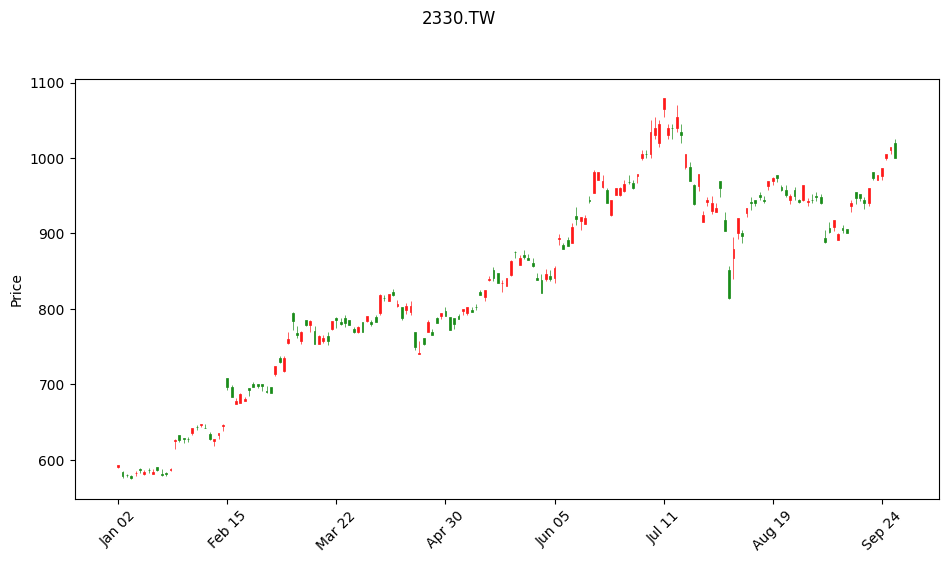

In [9]:
import mplfinance as mpf

Kdata=data.set_index('Date')   # 創建一個新的DataFrame，用Date當索引，要畫時間軸

# 設置樣式
color=mpf.make_marketcolors(up='r',down='g',inherit=True) #上漲紅色、下跌綠色、inherit=True：允許其他位明確指定的顏色用default
style=mpf.make_mpf_style(marketcolors=color)

mpf.plot(Kdata,
    type='candle',  # K線圖
    style=style,
    title=f'{stock_id}',
    ylabel='Price', # Y軸
    figsize=(12,6) # 圖形大小
    )

## 技術指標結合機器學習（線性回歸、決策樹、隨機森林）預測股價漲跌
- SMA_26特徵組合：RSI_14,MACD,SMA_26
- 使用技術指標作為特徵來預測第n天的股價。
- 先資料前處理。
- 80% 的數據用於訓練，20% 用於測試。

In [10]:
import numpy as np  # 數據處理、數值運算
from sklearn.model_selection import train_test_split  # 將數據分成訓練集、測試集
from sklearn.metrics import mean_squared_error # 評估模型效能

In [11]:
# 標籤生成：定義預測目標
n=1 # 可根據需要調整

# 創建Future_Price，值是Close向前移動n天
data["Future_Price"]=data["Close"].shift(-n)  # 將未來的價格和當前的特徵對齊

data.dropna(inplace=True) # 去除缺失值

SMAX=data[['SMA_26','rsi_14','MACD']]  # 使用特徵

SMAy=data['Future_Price'] # 標籤

SMAX.shape,SMAy.shape

((153, 3), (153,))

In [12]:
# 將數據集X 和標籤y分成訓練集和測試集
# 8:2
SMAX_train,SMAX_test,SMAy_train,SMAy_test=train_test_split(SMAX,SMAy,test_size=0.2,shuffle=False) # shuffle=False：數據不會被隨機打亂。

SMAX_train.shape,SMAX_test.shape,SMAy_train.shape,SMAy_test.shape # (樣本數,特徵列)

((122, 3), (31, 3), (122,), (31,))

In [13]:
# 劃出比較圖
import matplotlib.pyplot as plt
import pandas as pd

def plot_predictions(data,y_test,y_pred,model_name):
    results=pd.DataFrame({'Actual':y_test,'Predicted':y_pred},index=data.index[-len(y_test):])  # 使用原始數據的最後len(y_test)個索引

    # 繪製走勢圖
    plt.figure(figsize=(12, 6))
    plt.plot(results.index, results['Actual'], label='Actual Price', color='blue')
    plt.plot(results.index, results['Predicted'], label='Predicted Price', color='red')

    plt.title(f'{model_name} - Actual vs Predicted Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()

    # 顯示圖形
    plt.show()

### 線性回歸

In [14]:
from sklearn.linear_model import LinearRegression  # 線性回歸

# 創建並訓練線性回歸模型
SMAmodel_lr=LinearRegression()
SMAmodel_lr.fit(SMAX_train,SMAy_train)

# 預測測試集
SMAy_pred_lr=SMAmodel_lr.predict(SMAX_test)

# 評估模型
mse=mean_squared_error(SMAy_test,SMAy_pred_lr)
SMArmse_lr=np.sqrt(mse)
print(f"線性回歸模型的RMSE:{SMArmse_lr}")

# 預測價格
SMAfuture_pred_lr=SMAmodel_lr.predict(SMAX[-1:])
print(f"線性回歸模型預測的未來價格:{SMAfuture_pred_lr[0]:.2f}")

線性回歸模型的RMSE:31.875436438156342
線性回歸模型預測的未來價格:1005.49


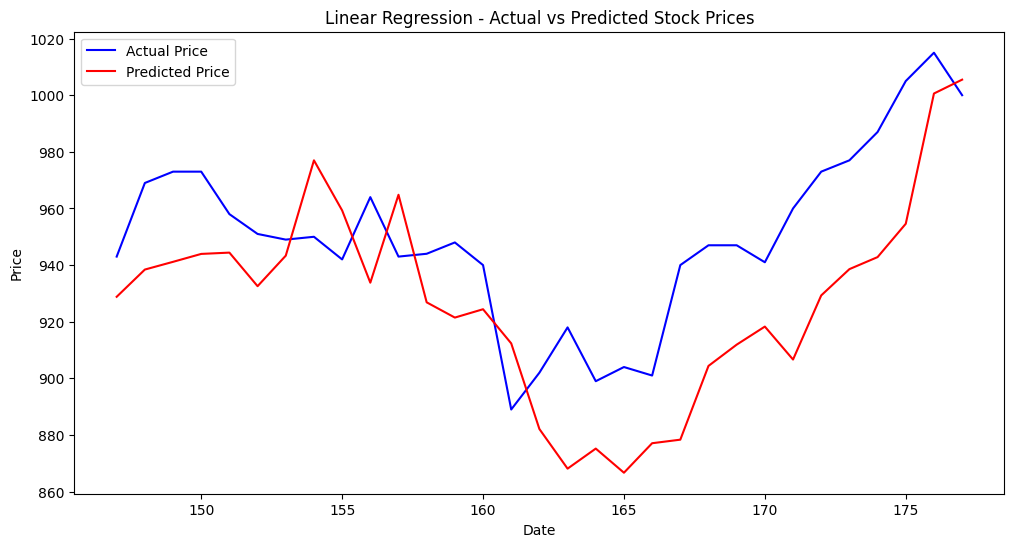

In [15]:
plot_predictions(data,SMAy_test,SMAy_pred_lr,"Linear Regression")

### 決策樹

In [16]:
from sklearn.tree import DecisionTreeRegressor  # 決策樹模型

# 創建並訓練決策樹模型
SMAmodel_dt=DecisionTreeRegressor()
SMAmodel_dt.fit(SMAX_train,SMAy_train)

# 預測測試集
SMAy_pred_dt=SMAmodel_dt.predict(SMAX_test)

# 評估模型
mse=mean_squared_error(SMAy_test,SMAy_pred_dt)
SMArmse_dt=np.sqrt(mse)
print(f"決策樹模型的RMSE:{SMArmse_dt}")

# 預測價格
SMAfuture_pred_dt=SMAmodel_dt.predict(SMAX[-1:])
print(f"決策樹模型預測的未來價格:{SMAfuture_pred_dt[0]:.2f}")

決策樹模型的RMSE:34.328113184949586
決策樹模型預測的未來價格:960.00


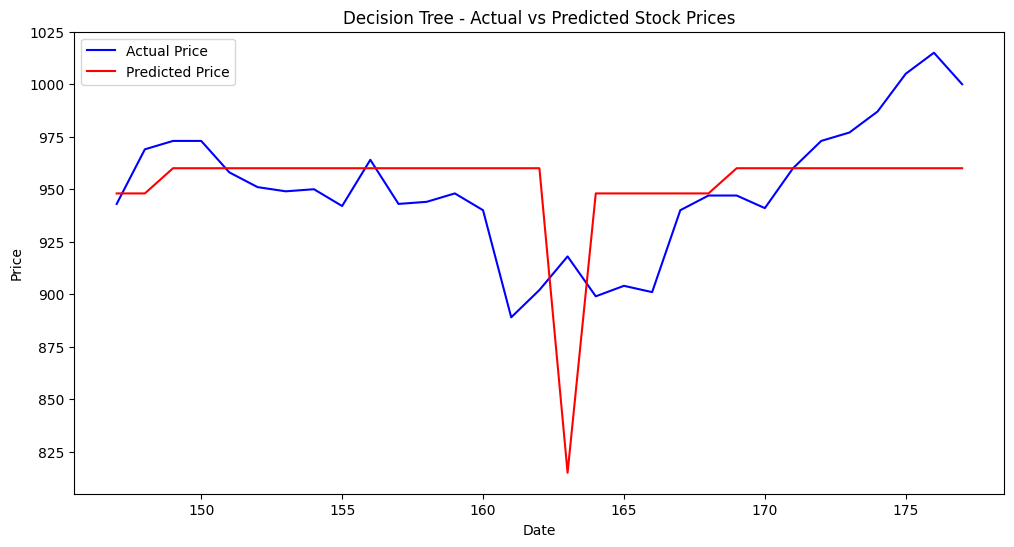

In [17]:
plot_predictions(data,SMAy_test,SMAy_pred_dt,"Decision Tree")

### 隨機森林

In [18]:
from sklearn.ensemble import RandomForestRegressor  # 隨機森林模型

# 創建並訓練隨機森林模型
SMAmodel_rf=RandomForestRegressor(n_estimators=100,random_state=42)
SMAmodel_rf.fit(SMAX_train,SMAy_train)

# 預測測試集
SMAy_pred_rf=SMAmodel_rf.predict(SMAX_test)

# 評估模型
SMAmse_rf=mean_squared_error(SMAy_test,SMAy_pred_rf)
SMArmse_rf=np.sqrt(SMAmse_rf)
print(f"隨機森林模型的RMSE:{SMArmse_rf}")

# 預測價格
SMAfuture_pred_rf=SMAmodel_rf.predict(SMAX[-1:])
print(f"隨機森林模型預測的未來價格:{SMAfuture_pred_rf[0]:.2f}")

隨機森林模型的RMSE:34.389136506714145
隨機森林模型預測的未來價格:940.37


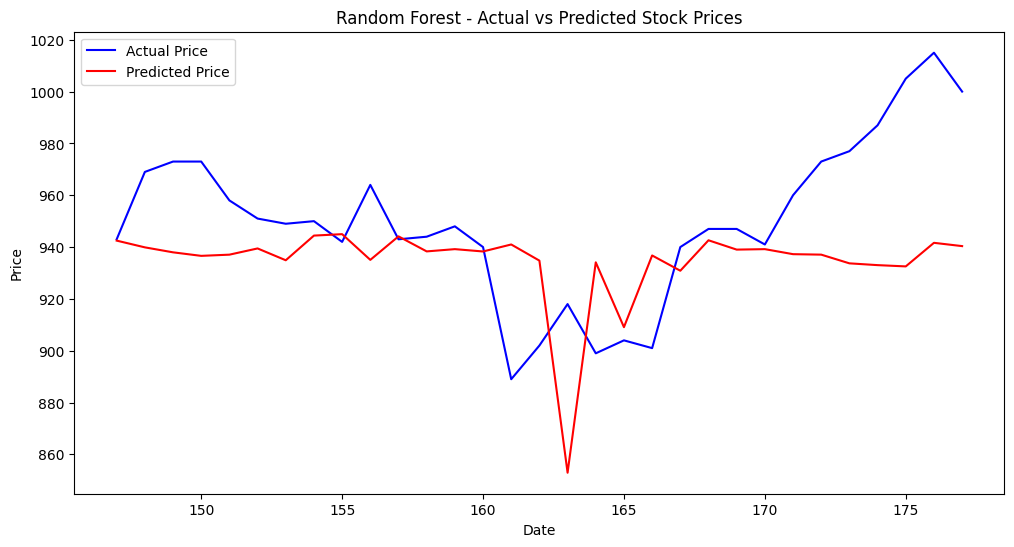

In [19]:
plot_predictions(data,SMAy_test,SMAy_pred_rf,"Random Forest")

## 技術指標結合機器學習（線性回歸、決策樹、隨機森林）預測股價漲跌
- EMA_26特徵組合：RSI_14,MACD,EMA_26
- 使用技術指標作為特徵來預測第n天的股價。
- 先資料前處理。
- 80% 的數據用於訓練，20% 用於測試。

In [20]:
import numpy as np  # 數據處理、數值運算
from sklearn.model_selection import train_test_split  # 將數據分成訓練集、測試集
from sklearn.metrics import mean_squared_error # 評估模型效能

In [21]:
# 標籤生成：定義預測目標
n=1 # 可根據需要調整

# 創建Future_Price，值是Close向前移動n天
data["Future_Price"]=data["Close"].shift(-n)  # 將未來的價格和當前的特徵對齊

data.dropna(inplace=True) # 去除缺失值

EMAX=data[['EMA_26','rsi_14','MACD']]  # 使用特徵

EMAy=data['Future_Price'] # 標籤

EMAX.shape,EMAy.shape

((152, 3), (152,))

In [22]:
# 將數據集X 和標籤y分成訓練集和測試集
# 8:2
EMAX_train,EMAX_test,EMAy_train,EMAy_test=train_test_split(EMAX,EMAy,test_size=0.2,shuffle=False) # shuffle=False：數據不會被隨機打亂。

EMAX_train.shape,EMAX_test.shape,EMAy_train.shape,EMAy_test.shape # (樣本數,特徵列)

((121, 3), (31, 3), (121,), (31,))

In [23]:
# 劃出比較圖
import matplotlib.pyplot as plt
import pandas as pd

def plot_predictions(data,y_test,y_pred,model_name):
    results=pd.DataFrame({'Actual':y_test,'Predicted':y_pred},index=data.index[-len(y_test):])  # 使用原始數據的最後len(y_test)個索引

    # 繪製走勢圖
    plt.figure(figsize=(12, 6))
    plt.plot(results.index, results['Actual'], label='Actual Price', color='blue')
    plt.plot(results.index, results['Predicted'], label='Predicted Price', color='red')

    plt.title(f'{model_name} - Actual vs Predicted Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()

    # 顯示圖形
    plt.show()

### 線性回歸

In [24]:
from sklearn.linear_model import LinearRegression  # 線性回歸

# 創建並訓練線性回歸模型
EMAmodel_lr=LinearRegression()
EMAmodel_lr.fit(EMAX_train,EMAy_train)

# 預測測試集
EMAy_pred_lr=EMAmodel_lr.predict(EMAX_test)

# 評估模型
mse=mean_squared_error(EMAy_test,EMAy_pred_lr)
EMArmse_lr=np.sqrt(mse)
print(f"線性回歸模型的RMSE:{EMArmse_lr}")

# 預測價格
EMAfuture_pred_lr=EMAmodel_lr.predict(EMAX[-1:])
print(f"線性回歸模型預測的未來價格:{EMAfuture_pred_lr[0]:.2f}")

線性回歸模型的RMSE:26.861755601614977
線性回歸模型預測的未來價格:1005.53


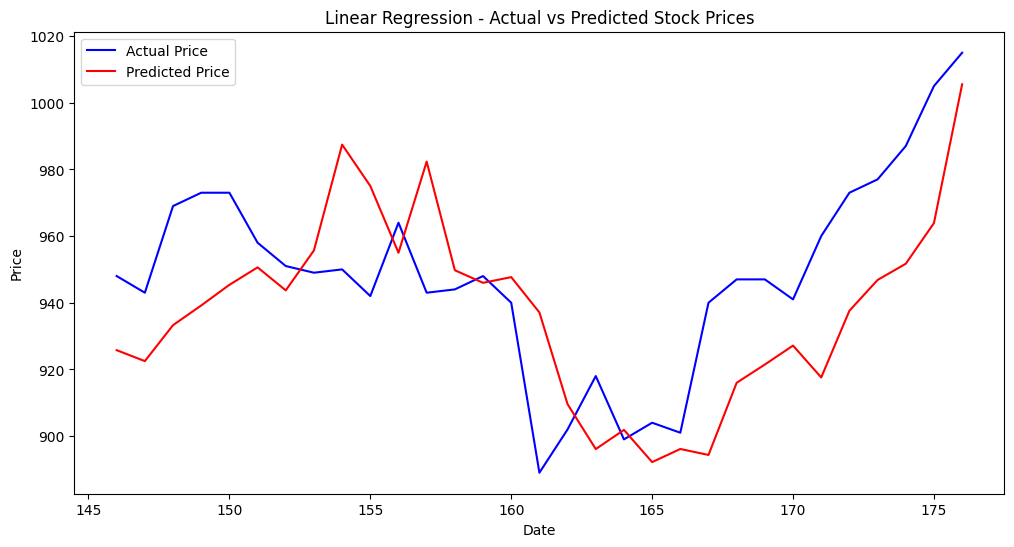

In [25]:
plot_predictions(data,EMAy_test,EMAy_pred_lr,"Linear Regression")

### 決策樹

In [26]:
from sklearn.tree import DecisionTreeRegressor  # 決策樹模型

# 創建並訓練決策樹模型
EMAmodel_dt=DecisionTreeRegressor()
EMAmodel_dt.fit(EMAX_train,EMAy_train)

# 預測測試集
EMAy_pred_dt=EMAmodel_dt.predict(EMAX_test)

# 評估模型
mse=mean_squared_error(EMAy_test,EMAy_pred_dt)
EMArmse_dt=np.sqrt(mse)
print(f"決策樹模型的RMSE:{EMArmse_dt}")

# 預測價格
EMAfuture_pred_dt=EMAmodel_dt.predict(EMAX[-1:])
print(f"決策樹模型預測的未來價格:{EMAfuture_pred_dt[0]:.2f}")

決策樹模型的RMSE:47.05316142407437
決策樹模型預測的未來價格:903.00


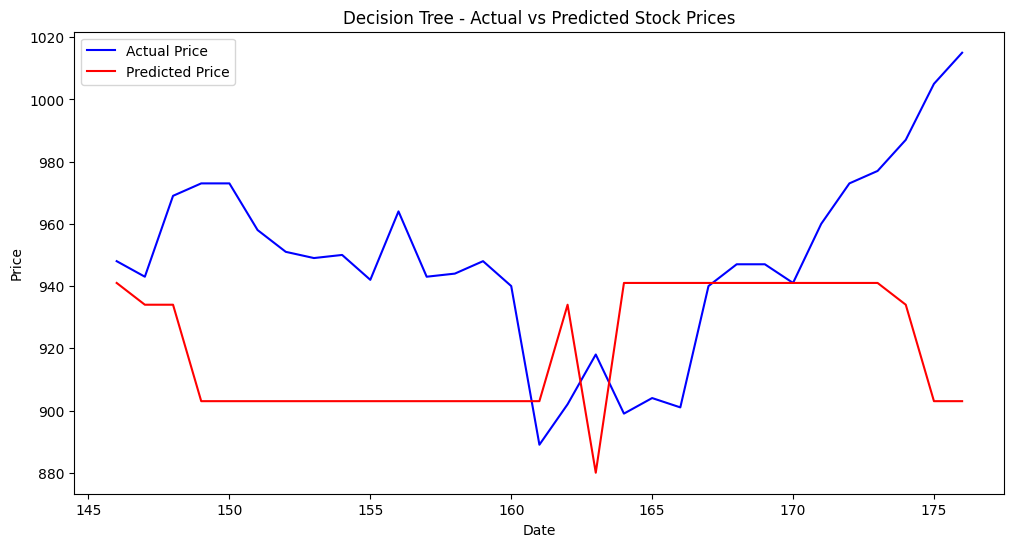

In [27]:
plot_predictions(data,EMAy_test,EMAy_pred_dt,"Decision Tree")

### 隨機森林

In [28]:
from sklearn.ensemble import RandomForestRegressor  # 隨機森林模型

# 創建並訓練隨機森林模型
EMAmodel_rf=RandomForestRegressor(n_estimators=100,random_state=42)
EMAmodel_rf.fit(EMAX_train,EMAy_train)

# 預測測試集
EMAy_pred_rf=EMAmodel_rf.predict(EMAX_test)

# 評估模型
mse_rf=mean_squared_error(EMAy_test,EMAy_pred_rf)
EMArmse_rf=np.sqrt(mse_rf)
print(f"隨機森林模型的RMSE:{EMArmse_rf}")

# 預測價格
EMAfuture_pred_rf=EMAmodel_rf.predict(EMAX[-1:])
print(f"隨機森林模型預測的未來價格:{EMAfuture_pred_rf[0]:.2f}")

隨機森林模型的RMSE:38.58727247129801
隨機森林模型預測的未來價格:929.98


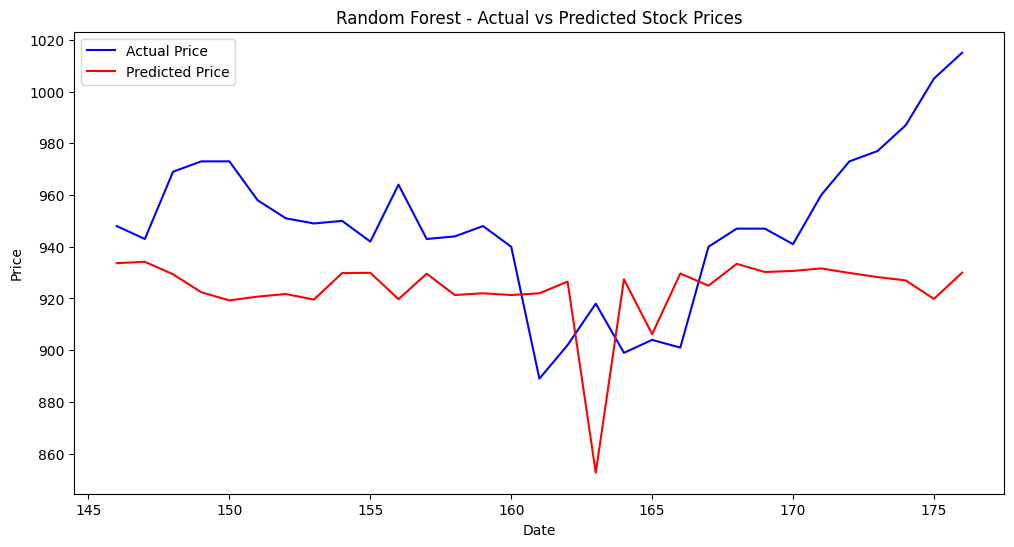

In [29]:
plot_predictions(data,EMAy_test,EMAy_pred_rf,"Random Forest")

## 模型評估

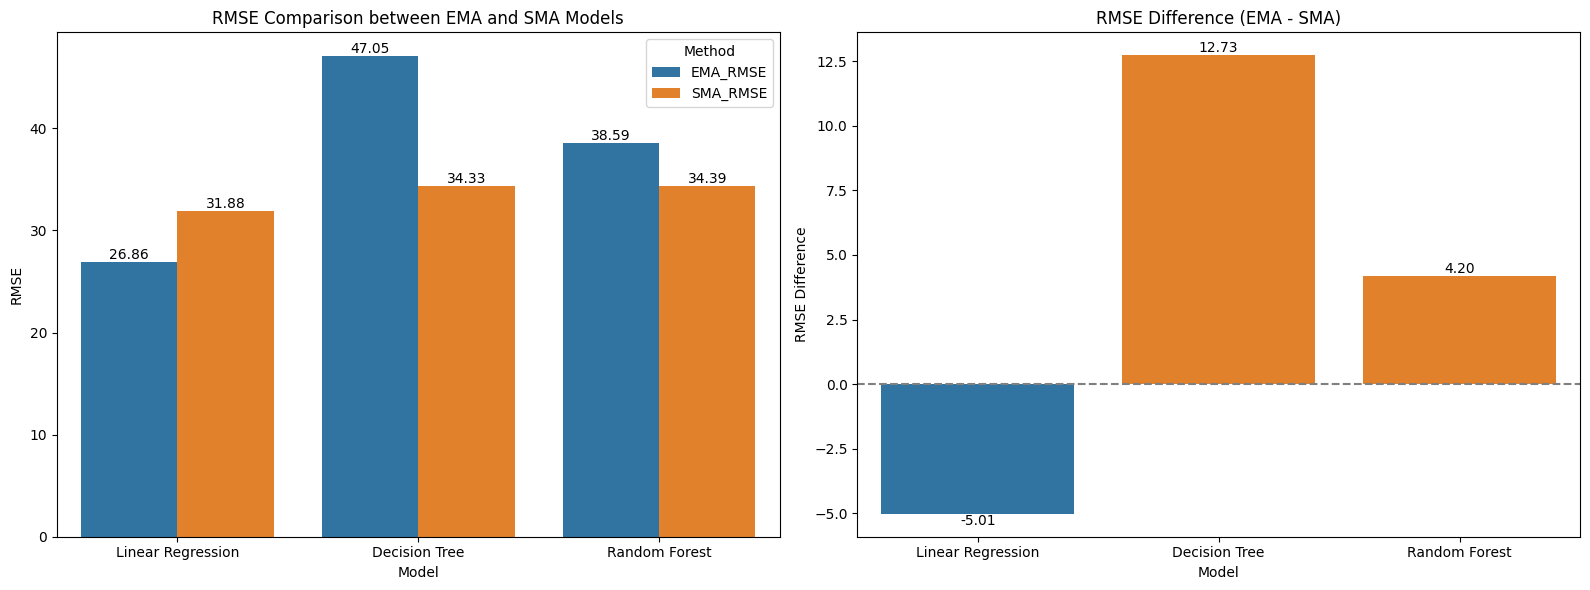

In [30]:
import seaborn as sns

# 假設這些是您的原始 RMSE 數據
datamodel = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'EMA_RMSE': [EMArmse_lr, EMArmse_dt, EMArmse_rf],
    'SMA_RMSE': [SMArmse_lr, SMArmse_dt, SMArmse_rf]
}

df = pd.DataFrame(datamodel)
df['Difference'] = df['EMA_RMSE'] - df['SMA_RMSE']
df['Color'] = ['red' if x > 0 else 'green' for x in df['Difference']]

# 設置圖形
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 繪製原始 RMSE 數據的柱狀圖
sns.barplot(x='Model', y='RMSE', hue='Method', data=pd.melt(df, id_vars=['Model'], value_vars=['EMA_RMSE', 'SMA_RMSE'], var_name='Method', value_name='RMSE'), ax=ax1)
ax1.set_title('RMSE Comparison between EMA and SMA Models')
ax1.set_ylabel('RMSE')
ax1.legend(title='Method')

# 在每個柱子上添加數值標籤
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.2f', label_type='edge')

# 繪製差值的柱狀圖
sns.barplot(x='Model', y='Difference', hue='Color', data=df, ax=ax2, dodge=False, legend=False)
ax2.set_title('RMSE Difference (EMA - SMA)')
ax2.set_ylabel('RMSE Difference')
ax2.axhline(y=0, color='gray', linestyle='--')

# 在每個柱子上添加數值標籤
for i, v in enumerate(df['Difference']):
    ax2.text(i, v, f'{v:.2f}', ha='center', va='bottom' if v > 0 else 'top')

# 調整布局
plt.tight_layout()
plt.show()

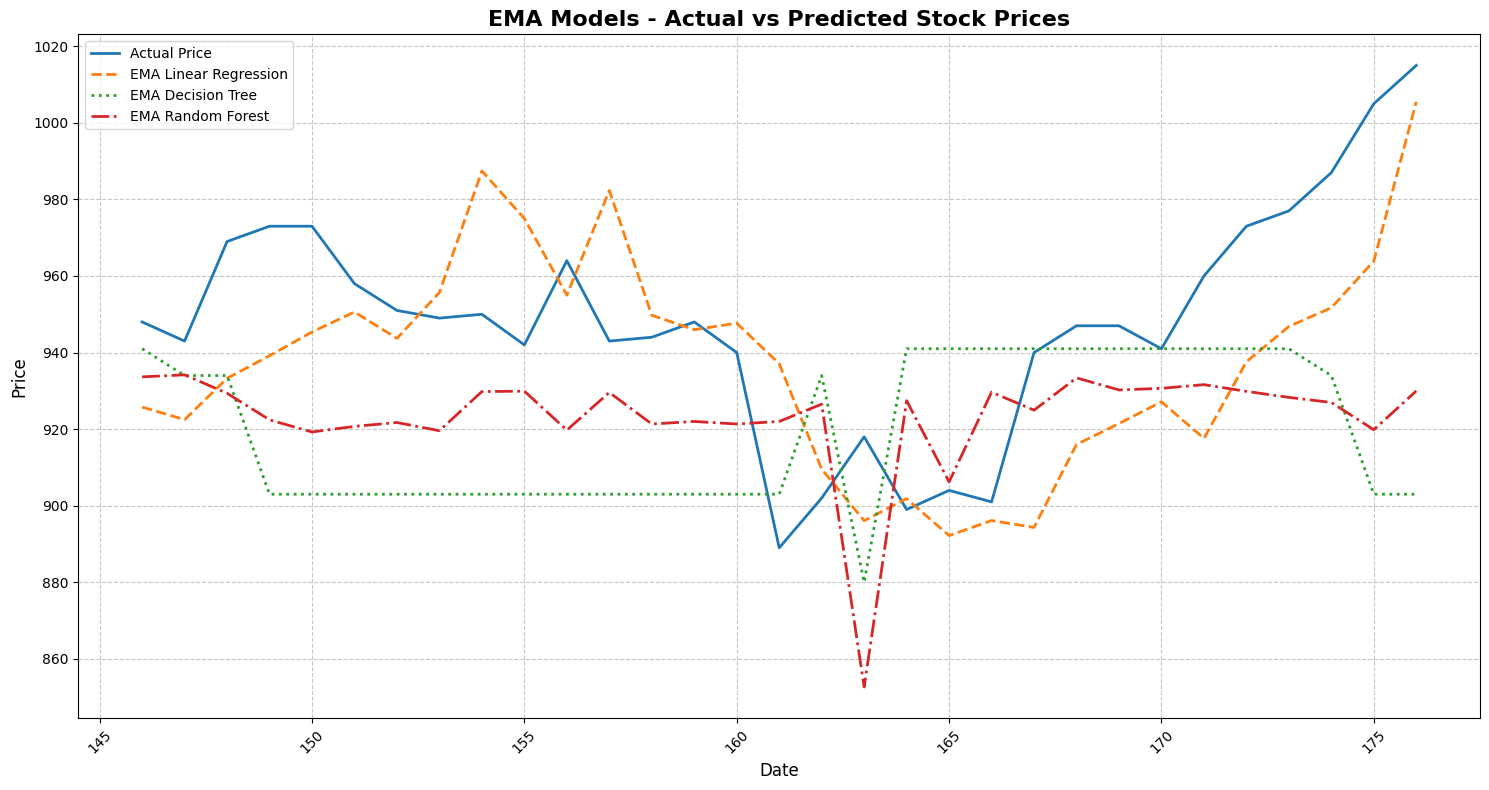

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# 使用 EMA 相關的變量
data = data  # 您的原始數據 DataFrame
y_test = EMAy_test  # 實際的測試集價格
lr_pred = EMAy_pred_lr  # EMA 線性回歸預測結果
dt_pred = EMAy_pred_dt  # EMA 決策樹預測結果
rf_pred = EMAy_pred_rf  # EMA 隨機森林預測結果

# 創建一個包含所有預測和實際價格的 DataFrame
results = pd.DataFrame({
    'Actual': y_test,
    'EMA Linear Regression': lr_pred,
    'EMA Decision Tree': dt_pred,
    'EMA Random Forest': rf_pred
}, index=data.index[-len(y_test):])  # 使用原始數據的最後 len(y_test) 個索引

# 設置鮮明的顏色
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # 藍、橙、綠、紅

# 繪製走勢圖
plt.figure(figsize=(15, 8))
plt.plot(results.index, results['Actual'], label='Actual Price', color=colors[0], linewidth=2)
plt.plot(results.index, results['EMA Linear Regression'], label='EMA Linear Regression', color=colors[1], linestyle='--', linewidth=2)
plt.plot(results.index, results['EMA Decision Tree'], label='EMA Decision Tree', color=colors[2], linestyle=':', linewidth=2)
plt.plot(results.index, results['EMA Random Forest'], label='EMA Random Forest', color=colors[3], linestyle='-.', linewidth=2)

plt.title('EMA Models - Actual vs Predicted Stock Prices', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(fontsize=10, loc='upper left')

# 旋轉 x 軸日期標籤以避免重疊
plt.xticks(rotation=45)

# 添加網格
plt.grid(True, linestyle='--', alpha=0.7)

# 調整布局
plt.tight_layout()

# 顯示圖形
plt.show()

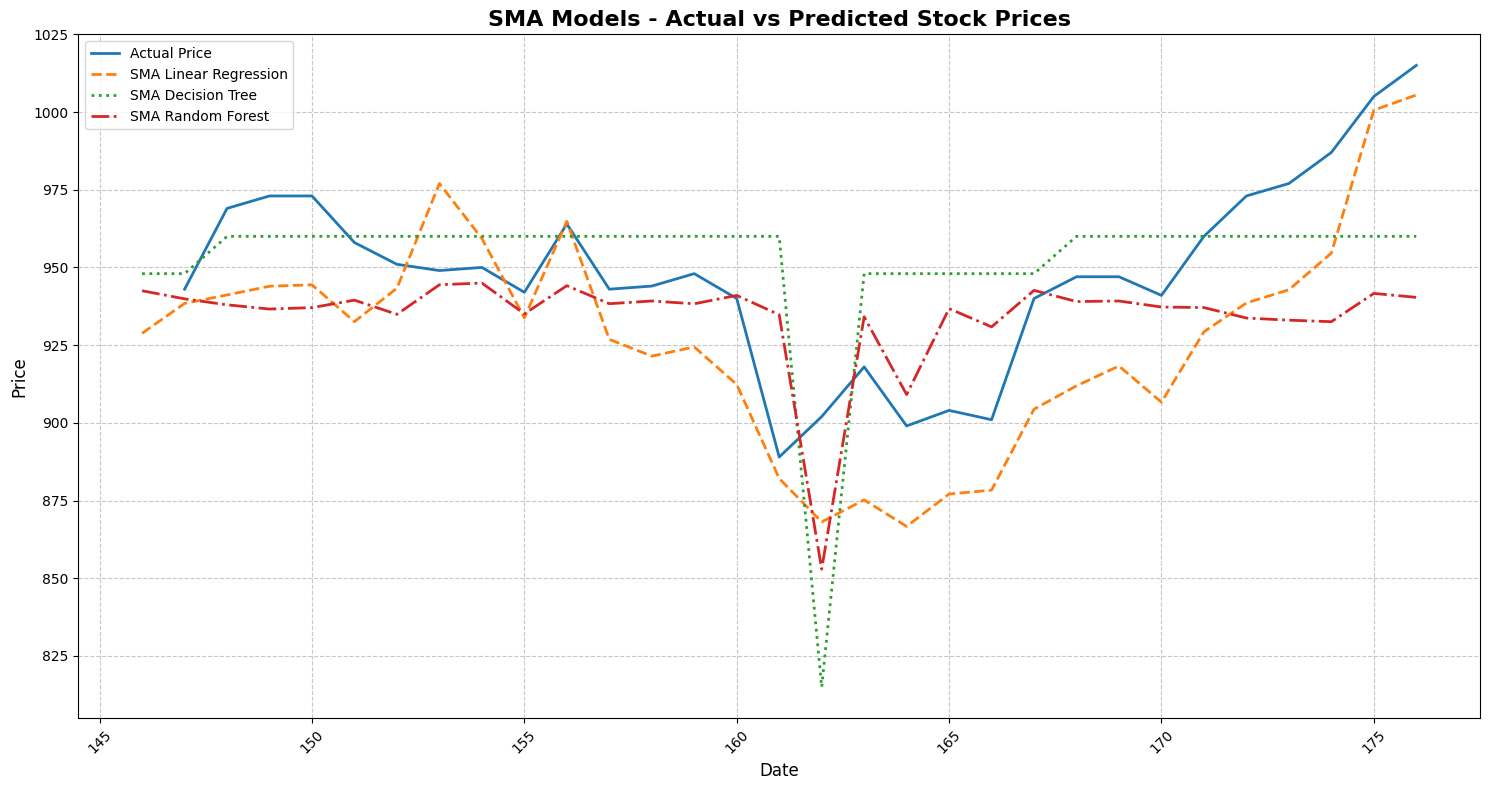

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# 使用 SMA 相關的變量
data = data  # 您的原始數據 DataFrame
y_test = SMAy_test  # 實際的測試集價格
lr_pred = SMAy_pred_lr  # SMA 線性回歸預測結果
dt_pred = SMAy_pred_dt  # SMA 決策樹預測結果
rf_pred = SMAy_pred_rf  # SMA 隨機森林預測結果

# 創建一個包含所有預測和實際價格的 DataFrame
results = pd.DataFrame({
    'Actual': y_test,
    'SMA Linear Regression': lr_pred,
    'SMA Decision Tree': dt_pred,
    'SMA Random Forest': rf_pred
}, index=data.index[-len(y_test):])  # 使用原始數據的最後 len(y_test) 個索引

# 設置更鮮明的顏色
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # 藍、橙、綠、紅

# 繪製走勢圖
plt.figure(figsize=(15, 8))
plt.plot(results.index, results['Actual'], label='Actual Price', color=colors[0], linewidth=2)
plt.plot(results.index, results['SMA Linear Regression'], label='SMA Linear Regression', color=colors[1], linestyle='--', linewidth=2)
plt.plot(results.index, results['SMA Decision Tree'], label='SMA Decision Tree', color=colors[2], linestyle=':', linewidth=2)
plt.plot(results.index, results['SMA Random Forest'], label='SMA Random Forest', color=colors[3], linestyle='-.', linewidth=2)

plt.title('SMA Models - Actual vs Predicted Stock Prices', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(fontsize=10, loc='upper left')

# 旋轉 x 軸日期標籤以避免重疊
plt.xticks(rotation=45)

# 添加網格
plt.grid(True, linestyle='--', alpha=0.7)

# 調整布局
plt.tight_layout()

# 顯示圖形
plt.show()

## Week2作業

### 證交所爬股票資料
- 股票代號(symbol)：2330
- 今天日期(current_date)：date.today()
- 證交所api：https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date={current_date}&stockNo={symbol}
- 欄位標題：都用爬的


In [33]:
import pandas as pd
import requests
from datetime import date
from IPython.display import display
import json

# 股票代號
symbol='2330'

# 今天日期
current_date=date.today().strftime('%Y%m%d')

# 使用API請求URL
url=f'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date={current_date}&stockNo={symbol}'

# 發送請求並獲取數據
response=requests.get(url)
json_data=response.json()

# 從API抓取標題和數據
title=json_data['title']
stock_data=json_data['data']
columns=json_data['fields']

# 創建DataFrame
df=pd.DataFrame(stock_data,columns=columns)

# 顯示標題
print(title)

# 顯示DataFrame
display(df.style.set_properties(**{'text-align':'right'}))

113年09月 2330 台積電           各日成交資訊


,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,113/09/02,"19,272,593","18,270,058,260",950.00,955.00,943.00,948.00,+4.00,"31,642"
1,113/09/03,"23,205,623","21,908,471,541",948.00,952.00,939.00,940.00,-8.00,"47,139"
2,113/09/04,"93,169,835","83,424,133,824",894.00,905.00,888.00,889.00,-51.00,"393,210"
3,113/09/05,"34,147,890","30,998,595,394",907.00,915.00,900.00,902.00,+13.00,"63,902"
4,113/09/06,"28,248,063","25,786,016,936",909.00,918.00,903.00,918.00,+16.00,"38,415"
5,113/09/09,"38,448,946","34,456,838,126",892.00,900.00,891.00,899.00,-19.00,"102,365"
6,113/09/10,"34,312,646","31,067,424,234",907.00,911.00,901.00,904.00,+5.00,"45,141"
7,113/09/11,"19,513,256","17,621,000,956",906.00,906.00,900.00,901.00,-3.00,"30,789"
8,113/09/12,"43,749,260","40,999,951,508",936.00,944.00,928.00,940.00,X0.00,"80,643"
9,113/09/13,"28,307,441","26,795,862,243",955.00,955.00,939.00,947.00,+7.00,"39,071"


In [34]:
print(json.dumps(response.json(),indent=4))

{
    "stat": "OK",
    "date": "20240930",
    "title": "113\u5e7409\u6708 2330 \u53f0\u7a4d\u96fb           \u5404\u65e5\u6210\u4ea4\u8cc7\u8a0a",
    "fields": [
        "\u65e5\u671f",
        "\u6210\u4ea4\u80a1\u6578",
        "\u6210\u4ea4\u91d1\u984d",
        "\u958b\u76e4\u50f9",
        "\u6700\u9ad8\u50f9",
        "\u6700\u4f4e\u50f9",
        "\u6536\u76e4\u50f9",
        "\u6f32\u8dcc\u50f9\u5dee",
        "\u6210\u4ea4\u7b46\u6578"
    ],
    "data": [
        [
            "113/09/02",
            "19,272,593",
            "18,270,058,260",
            "950.00",
            "955.00",
            "943.00",
            "948.00",
            "+4.00",
            "31,642"
        ],
        [
            "113/09/03",
            "23,205,623",
            "21,908,471,541",
            "948.00",
            "952.00",
            "939.00",
            "940.00",
            "-8.00",
            "47,139"
        ],
        [
            "113/09/04",
            "93,169,835",
  

### yahoo股票資料爬蟲
- 股票代號：2330
- 目標網址：https://tw.stock.yahoo.com/quote/2330.TW

In [35]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# 目標網址
url='https://tw.stock.yahoo.com/quote/2330.TW'

# 發送請求
headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
response=requests.get(url,headers=headers)

# 使用BeautifulSoup解析HTML
soup=BeautifulSoup(response.text,'html.parser')

# 找到指定的 class
element=soup.find('ul',class_="D(f) Fld(c) Flw(w) H(192px) Mx(-16px)")

data={}

if element:
    for li in element.find_all('li'):
        spans=li.find_all('span')
        if len(spans)==2:
            label=spans[0].text.strip()
            value=spans[1].text.strip()
            data[label]=[value]

    # 創建DataFrame
    df=pd.DataFrame(data)

display(df)

,成交,開盤,最高,最低,均價,成交金額(億),昨收,總量,昨量,振幅
0,957,978,990,957,971,597.16,"1,000","61,439","35,720",3.30%
